# Model - CNN1

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation,Dropout,BatchNormalization

batch_size = 32

# Create an ImageDataGenerator for training, validation, and test datasets
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    '../data/splitted/train',
    target_size=(60, 60),
    batch_size=batch_size,
    class_mode='categorical'  # Automatically one-hot encodes the labels
)

# Load validation data
validation_generator = val_datagen.flow_from_directory(
    '../data/splitted/val',
    target_size=(60, 60),
    batch_size=batch_size,
    class_mode='categorical'  # Automatically one-hot encodes the labels
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    '../data/splitted/test',
    target_size=(60, 60),
    batch_size=batch_size,
    class_mode='categorical',  # Automatically one-hot encodes the labels
    shuffle=False               # Do not shuffle for evaluation
)

# Get a batch of training data
x_batch, y_batch = next(train_generator)

# Print the shape of the labels
print("Shape of x_batch:", x_batch.shape)  

# Print the shape of the labels
print("Shape of y_batch:", y_batch.shape)  # batch_size, number_of_classes

# Print the first label in one-hot encoded format
print("First label (one-hot encoded):", y_batch[0])

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (5, 5), activation='relu', input_shape=(60,60,3), padding="same"),
    layers.Conv2D(32, (5, 5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3),activation='relu',padding='same'),
    layers.Conv2D(128, (3, 3),activation='relu',padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(256, (3, 3),activation='relu',padding='same'),
    layers.Conv2D(256, (3, 3),activation='relu',padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=50  # Adjust number of epochs as needed
)

Found 14342 images belonging to 50 classes.
Found 4082 images belonging to 50 classes.
Found 2098 images belonging to 50 classes.
Shape of x_batch: (32, 60, 60, 3)
Shape of y_batch: (32, 50)
First label (one-hot encoded): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


e:\Bangla Alphabet Recognization Model\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
e:\Bangla Alphabet Recognization Model\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 250s 544ms/step - accuracy: 0.0332 - loss: 3.9964 - val_accuracy: 0.1223 - val_loss: 3.3729
Epoch 2/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1250 - loss: 3.6465 - val_accuracy: 0.1667 - val_loss: 3.3145
Epoch 3/50


C:\Users\ahmed\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


448/448 ━━━━━━━━━━━━━━━━━━━━ 227s 508ms/step - accuracy: 0.0935 - loss: 3.4671 - val_accuracy: 0.2010 - val_loss: 2.8807
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 248us/step - accuracy: 0.1250 - loss: 3.2723 - val_accuracy: 0.3889 - val_loss: 2.9665
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 214s 477ms/step - accuracy: 0.1773 - loss: 3.0405 - val_accuracy: 0.3595 - val_loss: 2.2962
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 162us/step - accuracy: 0.2500 - loss: 2.7173 - val_accuracy: 0.2222 - val_loss: 2.5187
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 204s 456ms/step - accuracy: 0.2433 - loss: 2.6889 - val_accuracy: 0.4530 - val_loss: 1.9450
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 171us/step - accuracy: 0.3750 - loss: 2.2681 - val_accuracy: 0.5556 - val_loss: 1.9147
Epoch 9/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 224s 501ms/step - accuracy: 0.3003 - loss: 2.3806 - val_accuracy: 0.4456 - val_loss: 1.8802
Epoch 10/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 189us/step - accuracy: 0.3125 - loss: 2.0413 - va

In [3]:
# import shutil

# Save the model using Keras's built-in method
model.save('CNN1_e50_mypc.h5')

print("Model and weights saved.")

# Move the saved model to the output directory
# shutil.move('my_model_e10.h5', '/kaggle/working/my_model_e50.h5')

Model and weights saved.


# Test Accuracy

In [4]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 293ms/step - accuracy: 0.9370 - loss: 0.2445
Test Loss: 0.26668229699134827, Test Accuracy: 0.932793140411377


# Accuracy Graph

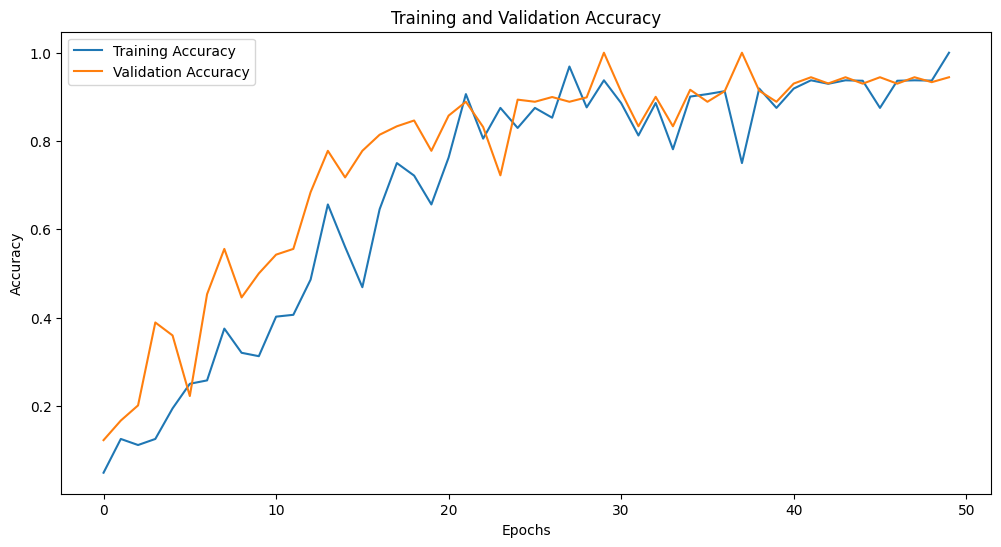

66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9370 - loss: 0.2445
Test Loss: 0.26668229699134827, Test Accuracy: 0.932793140411377


In [5]:
import matplotlib.pyplot as plt

# Plotting the accuracy graph for train and validation sets
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Model Summary

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 60, 60, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 60, 60, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 15, 15, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         3,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,148,792 (31.09 MB)

 Trainable params: 2,715,986 (10.36 MB)

 Non-trainable params: 832 (3.25 KB)

 Optimizer params: 5,431,974 (20.72 MB)